# Code for Linear Regression

## Importing Data

In [2]:
import csv, pandas as pd, numpy as np
csvfile = open('aapl.csv', newline='')
workbook = csv.reader(csvfile, delimiter=' ', quotechar='|')
print(workbook)

In [3]:
dates = []
opening_price = []
high_price = []
low_price = []
closing_price = []
volume = []
for row in workbook:
    try:
        array_row = row[0].split(',')
        try:
            float(array_row[1])
            float(array_row[2])
            float(array_row[3])
            float(array_row[4])
            float(array_row[5])
        except:
            print('Invalid Data: ', array_row)
            continue
        dates.append(array_row[0])
        opening_price.append(float(array_row[1]))
        high_price.append(float(array_row[2]))
        low_price.append(float(array_row[3]))
        closing_price.append(float(array_row[4]))
        volume.append(float(array_row[5]))
    except: 
        print(row)

features = {'opening_price':opening_price, 'high_price':high_price, 'low_price':low_price, 'volume':volume}
m = len(dates)
y = {'closing_price' : closing_price}

Invalid Data:  ['\ufeffDate', 'Open', 'High', 'Low', 'Close', 'Volume']


## Get X,Y DataFrames 

In [4]:
df_x = pd.DataFrame(features)
print(df_x)

      high_price  low_price  opening_price       volume
0         167.54     162.88         163.04   40644933.0
1         164.75     161.65         161.95   32549163.0
2         163.89     157.51         158.50   60819539.0
3         157.89     150.24         157.07   70672608.0
4         161.00     155.03         160.29   54390516.0
5         163.40     159.07         163.08   51608580.0
6         163.72     154.00         154.83   68243838.0
7         163.88     156.00         159.10   72738522.0
8         166.80     160.10         166.00   86593825.0
9         168.62     166.76         167.16   47230787.0
10        168.44     166.50         166.87   32478930.0
11        167.37     164.70         165.52   46048185.0
12        170.16     167.07         170.16   50640406.0
13        172.00     170.06         172.00   39143011.0
14        174.95     170.53         174.50   41529004.0
15        177.30     173.20         177.25   51105090.0
16        179.44     176.82         177.30   326

In [5]:
df_y = pd.DataFrame(y)
print(df_y)

      closing_price
0            167.37
1            164.34
2            162.71
3            156.41
4            155.15
5            159.54
6            163.03
7            156.49
8            160.50
9            167.78
10           167.43
11           166.97
12           167.96
13           171.51
14           171.11
15           174.22
16           177.04
17           177.00
18           178.46
19           179.26
20           179.10
21           176.19
22           177.09
23           175.28
24           174.29
25           174.33
26           174.35
27           175.00
28           173.03
29           172.23
...             ...
3970           1.74
3971           1.60
3972           1.62
3973           1.68
3974           1.69
3975           1.71
3976           1.73
3977           1.71
3978           1.64
3979           1.72
3980           1.70
3981           1.73
3982           1.75
3983           1.78
3984           1.82
3985           1.86
3986           1.84
3987           1.79


In [6]:
df_x.describe()

,high_price,low_price,opening_price,volume
count,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,51.318470,50.345553,50.852702,1.261720e+08
std,48.254563,47.536884,47.903902,1.000376e+08
min,0.940000,0.910000,0.930000,9.515800e+06
25%,9.557500,9.227500,9.397500,5.484920e+07
50%,31.415000,30.560000,30.950000,9.834802e+07
75%,89.247500,87.375000,88.412500,1.684245e+08
max,180.100000,178.250000,179.370000,8.432640e+08


In [7]:
df_y.describe()

,closing_price
count,4000.000000
mean,50.846305
std,47.909996
min,0.940000
25%,9.377500
50%,31.290000
75%,88.422500
max,179.260000


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/Users/priyanshubhatnagar/Documents/GitHub/Stock-Price-Prediction/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Split Training Data and Test Data

In [9]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=4)

In [10]:
reg.fit(x_train, y_train)

/Users/priyanshubhatnagar/Documents/GitHub/Stock-Price-Prediction/venv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Coefficients and Linear Regression

In [11]:
reg.coef_

array([[ 8.19691377e-01,  7.76935402e-01, -5.96481472e-01,
         1.18056278e-10]])

In [12]:
y_predicted = reg.predict(x_test)
print(y_predicted)

[[  6.34545474]
 [ 27.1436515 ]
 [174.15497626]
 [ 37.57302691]
 [102.72332804]
 [ 77.99159413]
 [ 81.40930817]
 [117.79044686]
 [ 50.91467098]
 [ 13.79774092]
 [ 10.516633  ]
 [  9.06968721]
 [ 11.50090166]
 [ 61.50774966]
 [ 35.86134416]
 [128.9273905 ]
 [  1.84870088]
 [117.31463298]
 [  5.28775203]
 [  1.92596239]
 [ 34.70275389]
 [  9.44243337]
 [121.32143546]
 [ 17.98549399]
 [153.2933745 ]
 [ 19.13007687]
 [ 59.83228762]
 [125.52473456]
 [ 75.67887735]
 [155.37667541]
 [ 73.1138677 ]
 [ 75.58245601]
 [ 91.12299688]
 [ 57.72132558]
 [ 49.64761553]
 [ 76.26259494]
 [127.09098988]
 [ 13.01812287]
 [ 80.70468239]
 [  1.44645145]
 [  1.11805382]
 [  1.44124926]
 [ 64.13864612]
 [  1.04068044]
 [  1.61500712]
 [  1.47243369]
 [ 26.01717559]
 [  9.5621301 ]
 [ 69.48045959]
 [ 12.70454075]
 [  6.17484813]
 [ 12.79859428]
 [ 60.28003455]
 [  1.65633429]
 [ 13.05297858]
 [  7.5769863 ]
 [ 64.99487818]
 [ 34.61485444]
 [ 56.42585248]
 [ 46.49885929]
 [173.75026913]
 [ 54.24410505]
 [  1.03

## Plots

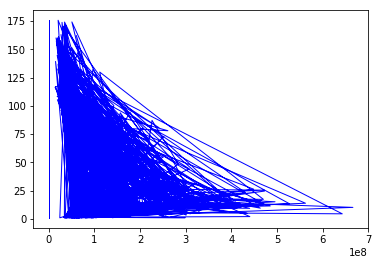

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_test, y_predicted, color='blue', linewidth=1)

In [23]:
print(y_test['closing_price'])

3264      6.36
2559     27.40
15      174.22
1872     37.56
491     103.01
1307     76.97
1055     81.13
328     118.25
1661     50.57
2341     13.77
3066     10.56
2896      9.09
2801     11.65
1154     61.47
1909     35.70
650     129.62
3470      1.86
289     116.95
3193      5.27
3487      1.95
1877     34.73
2977      9.46
640     121.30
2497     18.09
186     153.06
2194     19.30
1162     59.63
719     126.56
1287     75.29
175     154.45
         ...  
1407     85.56
224     140.88
376     109.22
2754     12.57
3419      2.30
2740     13.32
3284      5.19
128     157.48
573     122.00
1372     94.84
2238     15.21
1322     77.56
3905      1.07
3789      1.01
1723     47.26
3690      1.37
1267     63.19
3046     10.90
3019      9.89
182     153.87
2803     11.74
3650      1.43
3398      2.20
172     148.98
468     108.54
590     111.60
2835     11.50
3685      1.36
3822      1.07
997      75.39
Name: closing_price, Length: 800, dtype: float64


In [24]:
print(y_predicted)

[[  6.34545474]
 [ 27.1436515 ]
 [174.15497626]
 [ 37.57302691]
 [102.72332804]
 [ 77.99159413]
 [ 81.40930817]
 [117.79044686]
 [ 50.91467098]
 [ 13.79774092]
 [ 10.516633  ]
 [  9.06968721]
 [ 11.50090166]
 [ 61.50774966]
 [ 35.86134416]
 [128.9273905 ]
 [  1.84870088]
 [117.31463298]
 [  5.28775203]
 [  1.92596239]
 [ 34.70275389]
 [  9.44243337]
 [121.32143546]
 [ 17.98549399]
 [153.2933745 ]
 [ 19.13007687]
 [ 59.83228762]
 [125.52473456]
 [ 75.67887735]
 [155.37667541]
 [ 73.1138677 ]
 [ 75.58245601]
 [ 91.12299688]
 [ 57.72132558]
 [ 49.64761553]
 [ 76.26259494]
 [127.09098988]
 [ 13.01812287]
 [ 80.70468239]
 [  1.44645145]
 [  1.11805382]
 [  1.44124926]
 [ 64.13864612]
 [  1.04068044]
 [  1.61500712]
 [  1.47243369]
 [ 26.01717559]
 [  9.5621301 ]
 [ 69.48045959]
 [ 12.70454075]
 [  6.17484813]
 [ 12.79859428]
 [ 60.28003455]
 [  1.65633429]
 [ 13.05297858]
 [  7.5769863 ]
 [ 64.99487818]
 [ 34.61485444]
 [ 56.42585248]
 [ 46.49885929]
 [173.75026913]
 [ 54.24410505]
 [  1.03